In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# Mandelbrot set function
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

In [2]:
# Define the weighting functions

# Higher weight near the boundary
def weighting_function(x, y, a, xmin, xmax, ymin, ymax):
    distance_to_boundary = np.sqrt(x**2 + y**2)
    return np.exp(-0.1 * distance_to_boundary)

# Quadratic weighting function
def gaussian_weighting(x, y, a, xmin, xmax, ymin, ymax):
    # Calculate the maximum distance from the origin in the rectangular region
    max_distance = np.sqrt(max((xmax - xmin)**2, (ymax - ymin)**2))
    # Quadratic weighting function
    return np.exp(-a * (x**2 + y**2) / max_distance**2)

# Radial Basis Function (RBF) Weighting Function
def rbf_weighting(x, y, a, xmin, xmax, ymin, ymax):
    # Calculate the maximum distance from the origin in the rectangular region
    max_distance = np.sqrt(max((xmax - xmin)**2, (ymax - ymin)**2))
    # RBF weighting function
    return np.exp(-a * np.sqrt((x - (xmin + xmax) / 2)**2 + (y - (ymin + ymax) / 2)**2) / max_distance)

In [11]:
# Monte Carlo integration with importance sampling
def monte_carlo_importance_sampling(iterations, samples, xmin, xmax, ymin, ymax, total_area, weighting_func, *args):
    total_samples = iterations * samples
    area_estimations = np.zeros(iterations, samples)

    # for i in range(iterations):
    area_estimate = 0
    for _ in range(samples):
        # Sample points with importance weights
        x = np.random.uniform(xmin, xmax)
        y = np.random.uniform(ymin, ymax)
        # weight = weighting_func(x, y, *args)
        weight = weighting_func(x, y, *args, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

        # Check if the point is in the Mandelbrot set
        if mandelbrot(complex(x, y), 100) == 100-1:
            area_estimate += weight

    # Normalize the result and scale by the total area
    area_estimate /= samples
    area_estimations = area_estimate * total_area
    
    print(area_estimations)
    # Calculate absolute errors

    return area_estimations

In [8]:
def run_monte_carlo_simulation(i_values, s_values, xmin, xmax, ymin, ymax, total_area, num_simulations, weighting_function, a_value):
    average_estimates = []
    average_errors = []

    for s in s_values:
        row_estimate = []
        row_error = []

        for i in i_values:
            simulation_results = [monte_carlo_importance_sampling(i, s, xmin, xmax, ymin, ymax, total_area, weighting_function, a_value) for _ in range(num_simulations)]
            average_estimate = np.mean([np.mean(results[0]) for results in simulation_results])
            average_error = np.mean([np.mean(np.abs(results[0][1:] - results[0][:-1])) for results in simulation_results])
            # std_area_estimates = np.std(average_estimate, axis=1)
            # t_value = stats.t.ppf(1 - 0.025, num_simulations - 1)
            # margin_of_error = t_value * (std_area_estimates / np.sqrt(num_simulations))

            # upper_bound = average_estimate + margin_of_error
            # lower_bound = average_estimate - margin_of_error

            row_estimate.append(average_estimate)
            row_error.append(row_error)

        average_estimates.append(row_estimate)
        average_errors.append(row_error)

    return average_estimates, average_errors

In [12]:
# Parameters
i_values = range(1, 101, 5)
s_values = [200, 400, 600, 800, 1000]  # Adjust sample sizes as needed
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
total_area = (xmax - xmin) * (ymax - ymin)
num_simulations = 1

# Calculate the maximum distance from the origin in the rectangular region; used in quadratic weighting
max_distance = np.sqrt(max((xmax - xmin)**2, (ymax - ymin)**2))

# Adjust the a value based on the desired spread of influence; used in quadratic weighting
a_value = 1.0 / (2 * max_distance)

# Original weighting function; higher weight near the edge
average_estimates_original, average_errors_original = run_monte_carlo_simulation(
    i_values, s_values, xmin, xmax, ymin, ymax, total_area, num_simulations, weighting_function, a_value
)

# Gaussian weighting function with adjusted a value
average_estimates_quadratic, average_errors_quadratic = run_monte_carlo_simulation(
    i_values, s_values, xmin, xmax, ymin, ymax, total_area, num_simulations, gaussian_weighting, a_value
)

# RBF weighting function
average_estimates_rbf, average_errors_rbf = run_monte_carlo_simulation(
    i_values, s_values, xmin, xmax, ymin, ymax, total_area, num_simulations, rbf_weighting, a_value
)

[0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


c:\Users\koenw\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\koenw\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04316407 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.04202253 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0

KeyboardInterrupt: 

NameError: name 'average_estimates_original' is not defined

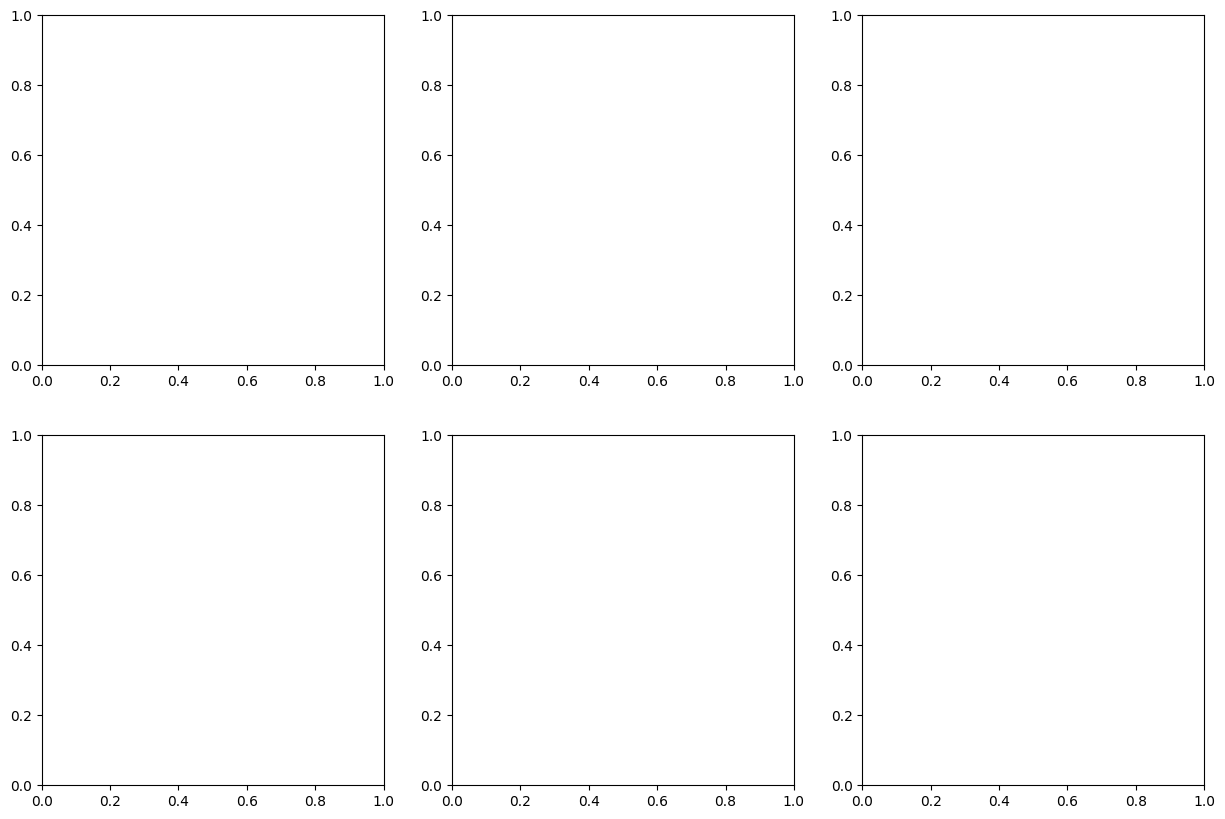

In [10]:
import matplotlib.pyplot as plt

# Plot the results for the weighting functions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot for average estimated area
for idx, s in enumerate(s_values):
    axes[0, 0].plot(i_values, average_estimates_original[idx], label=f'Original, Samples = {s}')
    axes[0, 1].plot(i_values, average_estimates_quadratic[idx], label=f'Quadratic, Samples = {s}')
    axes[0, 2].plot(i_values, average_estimates_rbf[idx], label=f'RBF, Samples = {s}')

axes[0, 0].set_title('Convergence Rate Analysis (Original Weighting)')
axes[0, 0].set_ylabel('Average Estimated Area')
axes[0, 0].legend()

axes[0, 1].set_title('Convergence Rate Analysis (Quadratic Weighting)')
axes[0, 1].legend()

axes[0, 2].set_title('Convergence Rate Analysis (RBF Weighting)')
axes[0, 2].set_ylabel('Average Estimated Area')
axes[0, 2].legend()

# Plot for average absolute error
for idx, s in enumerate(s_values):
    min_length = min(len(i_values[:-1]), len(average_errors_original[idx]))
    axes[1, 0].plot(i_values[:min_length], average_errors_original[idx][:min_length], label=f'Original, Samples = {s}')
    axes[1, 1].plot(i_values[:min_length], average_errors_quadratic[idx][:min_length], label=f'Quadratic, Samples = {s}')

    # Ensure average_errors_rbf has the same length as i_values
    min_length_rbf = min(len(i_values), len(average_errors_rbf[idx]))
    axes[1, 2].plot(i_values[:min_length_rbf], average_errors_rbf[idx][:min_length_rbf], label=f'RBF, Samples = {s}')

# Set x-label on both the top and bottom rows
axes[0, 0].set_xlabel('Number of Iterations (i)')
axes[0, 1].set_xlabel('Number of Iterations (i)')
axes[0, 2].set_xlabel('Number of Iterations (i)')

axes[1, 0].set_xlabel('Number of Iterations (i)')
axes[1, 1].set_xlabel('Number of Iterations (i)')
axes[1, 2].set_xlabel('Number of Iterations (i)')

axes[1, 0].set_ylabel('Average Absolute Error')
axes[1, 0].set_title('Absolute Error Analysis (Original Weighting)')
axes[1, 0].legend()

# Additional adjustments for the third column
axes[1, 1].set_ylabel('Average Absolute Error')
axes[1, 1].set_title('Absolute Error Analysis (Quadratic Weighting)')
axes[1, 1].legend()

axes[1, 2].set_ylabel('Average Absolute Error')
axes[1, 2].set_title('Absolute Error Analysis (RBF Weighting)')
axes[1, 2].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [3]:
def calculate_area_estimations_koen(xmin, xmax, ymin, ymax, i_max, s_values, num_runs, weighting_func, *args):
    area_estimations_sum = np.zeros((i_max, len(s_values), num_runs))
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")
        np.random.seed()
        for idx, s in enumerate(s_values):
            for j in range(1, i_max + 1):
                AM = 0.0
                for _ in range(s):
                    x = np.random.uniform(xmin, xmax)
                    y = np.random.uniform(ymin, ymax)
                    # Put if statements here 
                    weight = weighting_func(x, y, *args, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)

                    c = complex(x, y)
                    z = c
                    for _ in range(j):
                        if abs(z) > 2.0:
                            break
                        z = z * z + c
                    else:
                        # This is different as well
                        AM += (1 + weight)

                AM = (AM / s) * (xmax - xmin) * (ymax - ymin)
                area_estimations_sum[j - 1, idx, run] = AM
    return area_estimations_sum

In [ ]:
# Define the parameters
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5
i_max = 200
s_values = [10, 500, 1000, 1500, 2000, 2500]
num_runs = 10

# Calculate reference areas
# reference_areas = calculate_reference_areas(xmin, xmax, ymin, ymax, i_max, s_values, num_runs)

# Calculate area estimations
area_estimations_sum = calculate_area_estimations_koen(xmin, xmax, ymin, ymax, i_max, s_values, num_runs)
